Importing the required libraries 

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import sys 

In [27]:
#reading the dataset 
data = pd.read_csv('TSLA.CSV')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [28]:
#univariate time series 
stock_data = data[['Date','Close']]
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [29]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


Here date column is treated as object ,so convert it into time 

In [30]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9432\3223040857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data['Date'])


In [31]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [32]:
stock_data=stock_data.set_index("Date")
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


Why we are converting date coloumn into index column? 

1. I can easily retrive the data.
2. visualization is also simple. 
3. Libraries like scipy , statsmodel requires this date coloumn as index.
 

Performing EDA on the data

1. summary statistics 

In [33]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   758 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [36]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [35]:
stock_data.columns

Index(['Close'], dtype='object')

2. Visualization

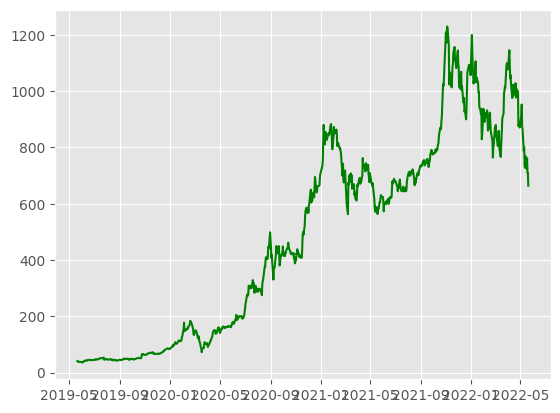

In [44]:
plt.plot(stock_data,color='green')

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

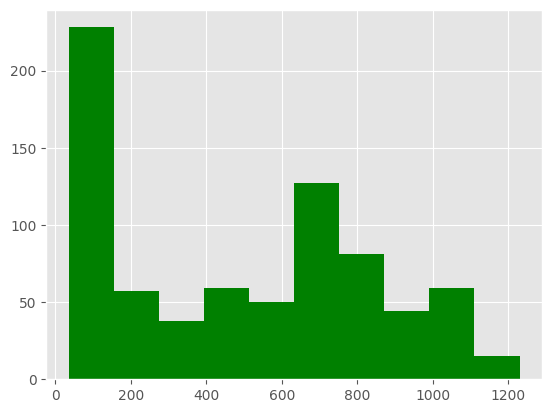

In [42]:
plt.hist(stock_data.Close,color='green')

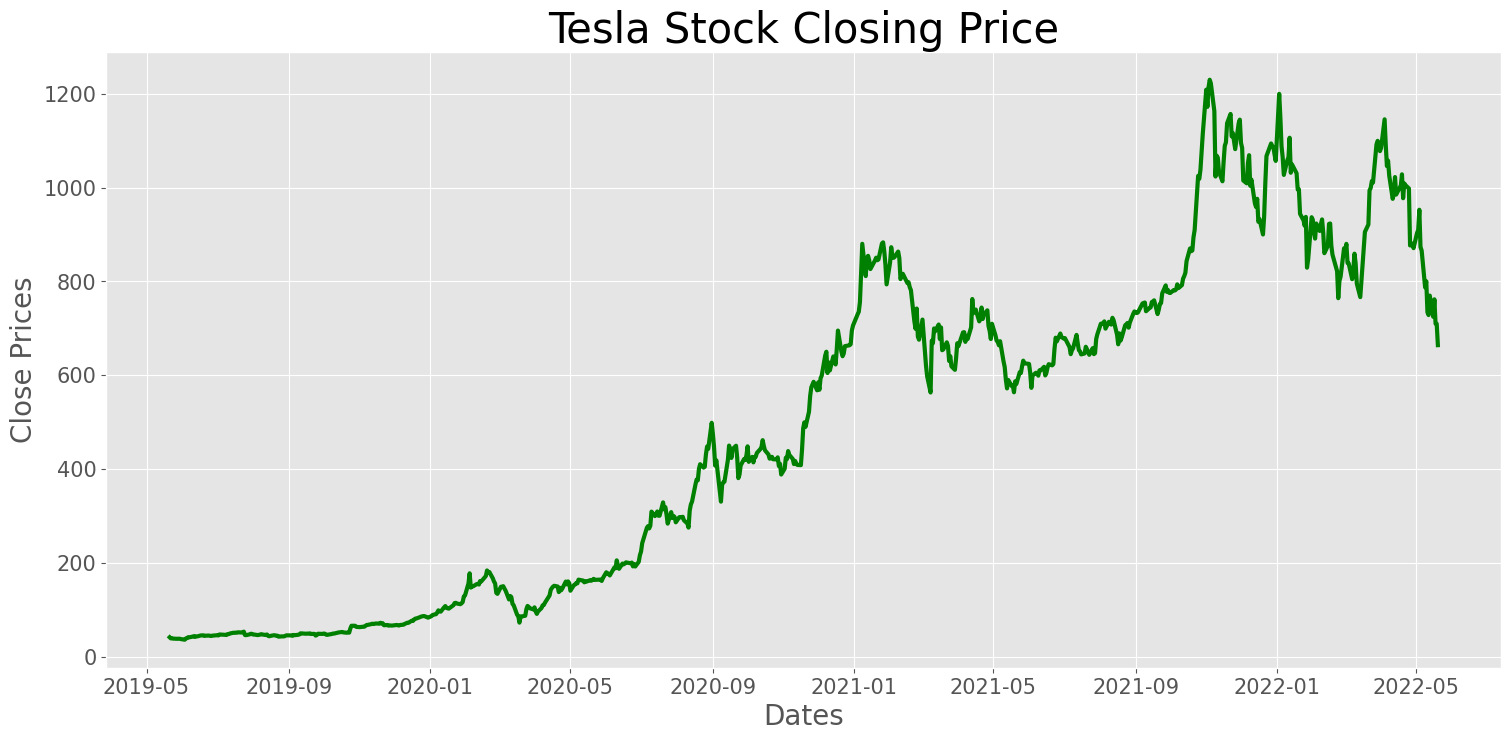

In [41]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'green')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

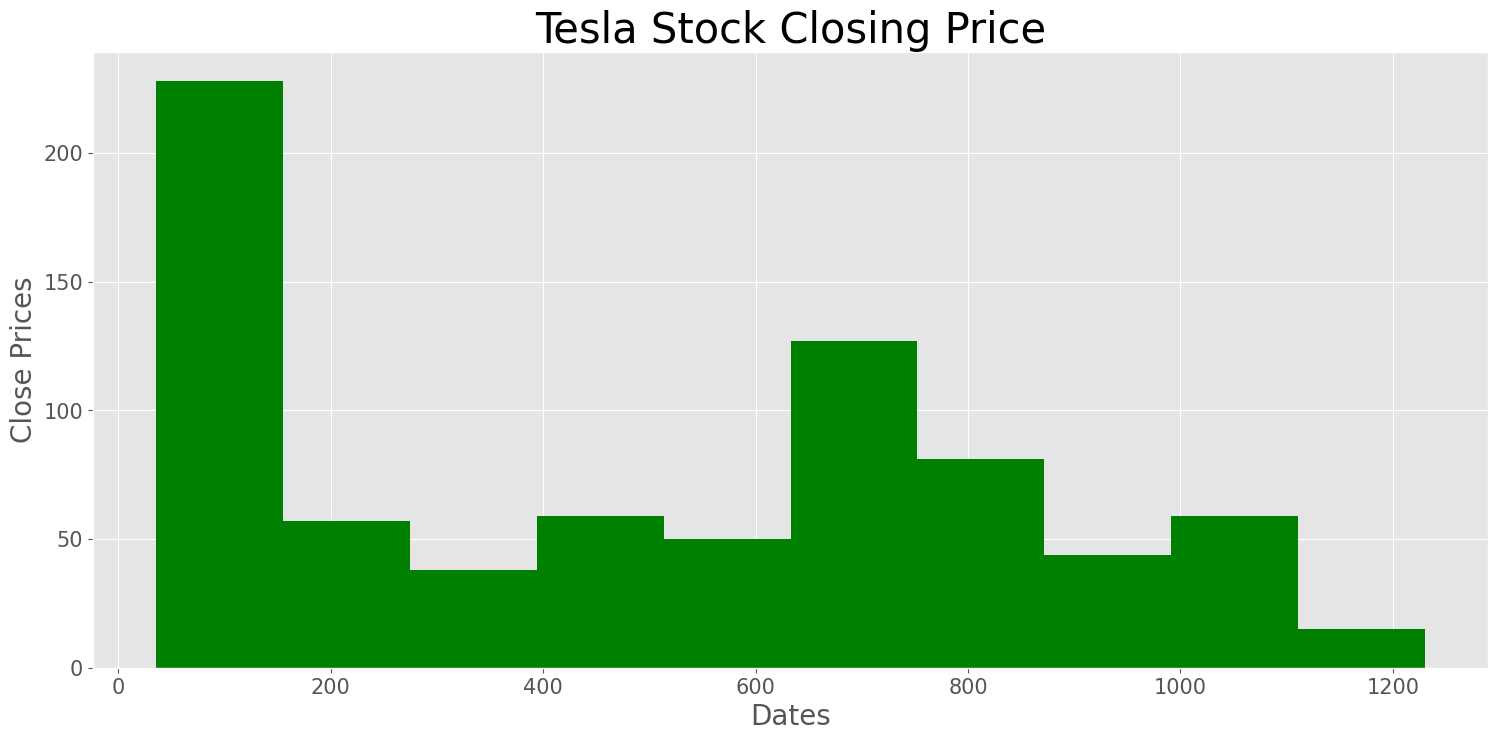

In [45]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'green')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

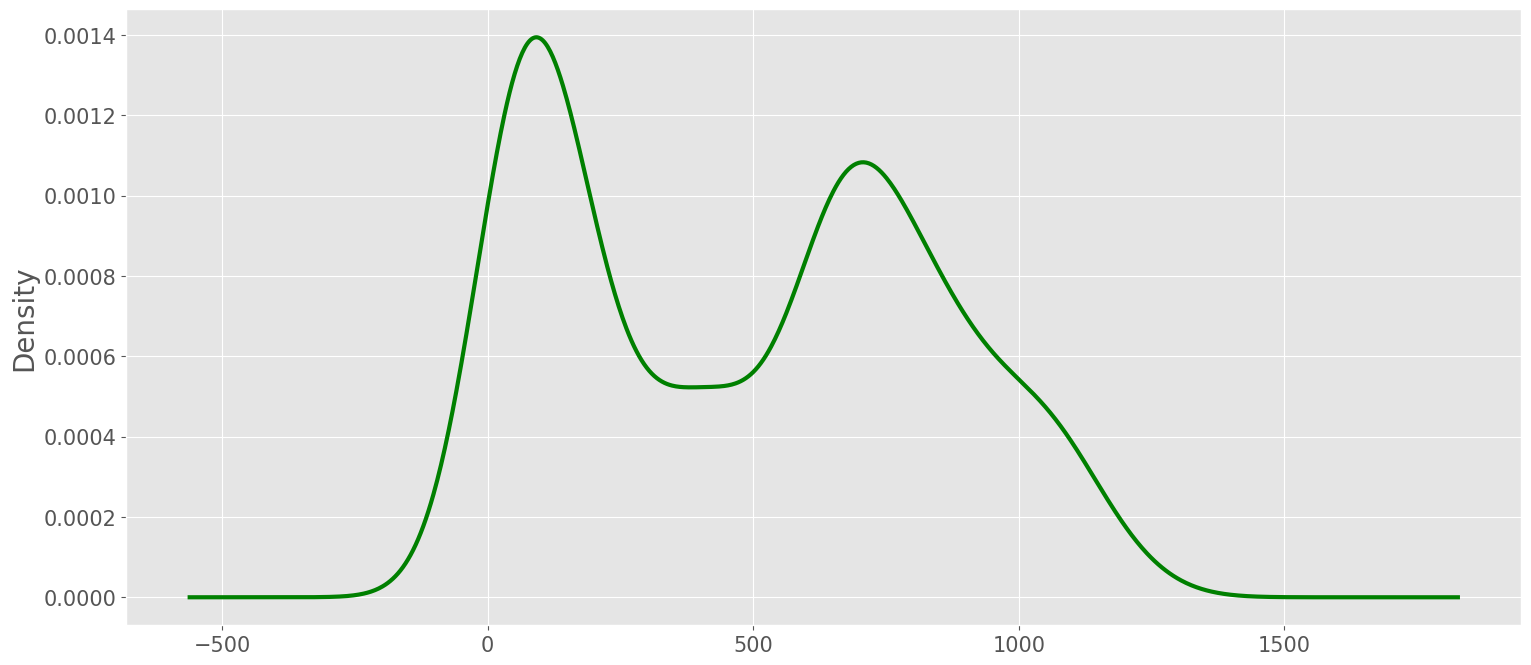

In [47]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3,color='green') 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

- The rolling mean function in Pandas allows for window-based calculations, where the window size determines the number of observations considered for each mean calculation. In this context, a rolling window of 12 means that the mean is calculated based on the last 12 observations in the 'Close' column.

- This rolling mean operation is particularly useful for time-series data analysis, providing insights into trends and patterns over specific intervals. By using rolling functions like .rolling() and .mean(), you can efficiently analyze data with a moving window approach, which is common in financial and statistical analysis

In [60]:
rolmean = stock_data['Close'].rolling(12).mean()

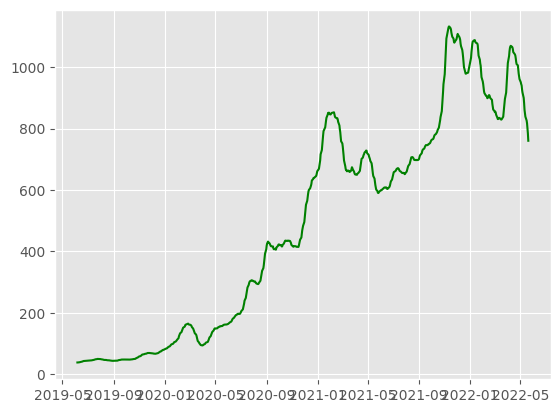

In [61]:
plt.plot(rolmean,color='green')

As the window size increase the smoothening of the curve also increases as follows;

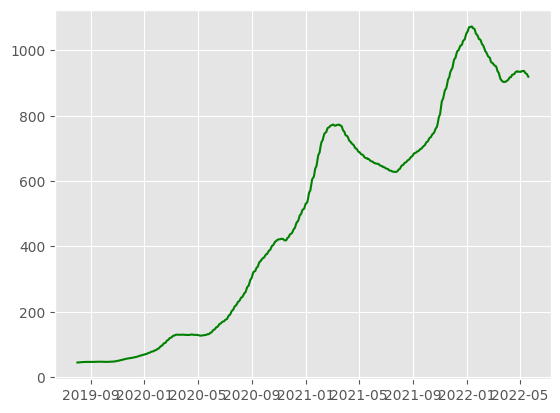

In [62]:
rolmean = stock_data['Close'].rolling(52).mean()
plt.plot(rolmean,color='green')

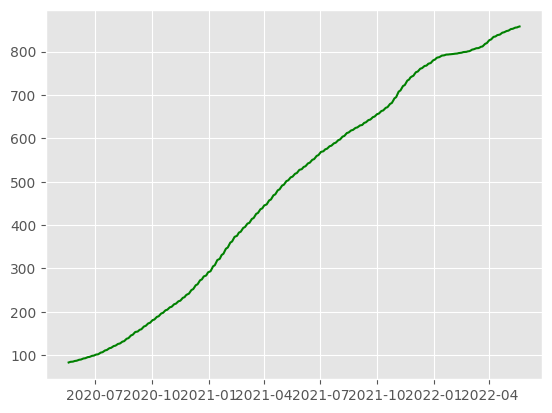

In [65]:
rolmean = stock_data['Close'].rolling(252).mean()
plt.plot(rolmean,color='green')

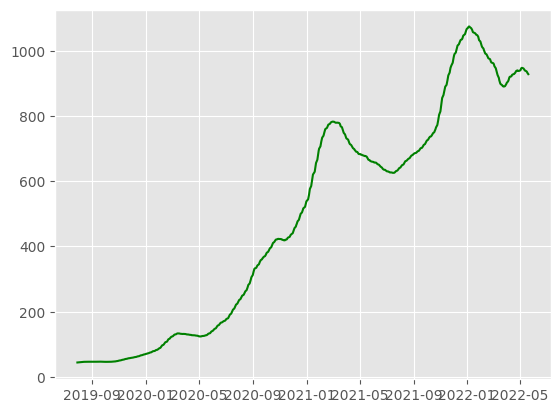

In [70]:
rolmean = stock_data['Close'].rolling(48).mean()
plt.plot(rolmean,color='green')

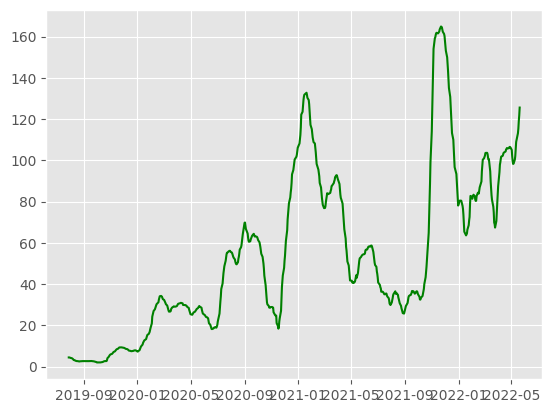

In [71]:
rolstd = stock_data['Close'].rolling(48).std()
plt.plot(rolstd,color='green')

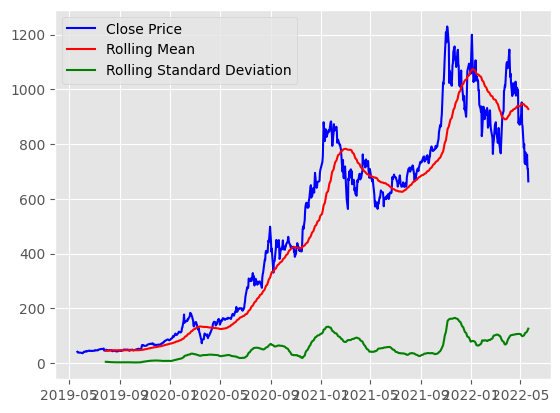

In [72]:
#visualizing the 3 contents in one graph 
plt.plot(stock_data['Close'], color='blue', label='Close Price')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='green', label='Rolling Standard Deviation')
plt.legend()
plt.show()

Here the Time series is  not stationary , since the mean is growing exponentially and not constant . 

**The Augmented Dickey-Fuller (ADF)** test is a statistical test used to determine if a unit root is present in a time series sample. The null hypothesis of the test is that a unit root exists, indicating non-stationarity in the data. The alternative hypothesis varies depending on the version of the test used, often implying stationarity or trend-stationarity

There are three main versions of the Dickey-Fuller test:

1. Type 0: No constant, no trend
2. Type 1: Constant, no trend
3. Type 2: Constant and trend

Each version uses different critical values for testing the presence of a unit root in the time series data. Selecting the appropriate version is crucial for accurate analysis

In [76]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.9 MB 812.7 kB/s eta 0:00:13
   ---------------------------------------- 0.1/9.9 MB 744.7 kB/s eta 0:00:14
   ---------------------------------------- 0.1/9.9 MB 654.9 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.9 MB 702.7 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.9 MB 692.9 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.9 MB 862.0 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.9 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.5/9.9 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/9.9 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.7/9.9 MB 1.4 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/9.9 MB 1.4 MB/s eta 0:00:07
   --- 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviz 0.1.806 requires fsspec>=0.8.3, which is not installed.
autoviz 0.1.806 requires nltk, which is not installed.
dtale 3.10.0 requires et-xmlfile; python_version >= "3.6", which is not installed.
dtale 3.10.0 requires future>=0.14.0, which is not installed.
dtale 3.10.0 requires lz4; python_version > "3.6", which is not installed.
dtale 3.10.0 requires networkx; python_version > "3.8", which is not installed.
dtale 3.10.0 requires openpyxl!=3.2.0b1; python_version >= "3.0", which is not installed.
dtale 3.10.0 requires plotly; python_version >= "3.6", which is not installed.
dtale 3.10.0 requires xarray; python_version >= "3.0", which is not installed.
ydata-profiling 4.6.0 requires numba<0.59.0,>=0.56.0, which is not installed.
ydata-profiling 4.6.0 requires PyYAML<6.1,>=5.0.0, which is not installed.
ydata

Hypothesis 

Ho: Data is not stationary
 
H1: Data is Stationary 

In [77]:
# ADF(Ada Fuller Test )
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])


In [78]:
adft 

(-1.3630085817037496,
 0.5998762543050695,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

* test statistic = -1.3630085817037496
* p-value = 0.5998762543050695
* lag = 9 
* total no.of data points = 748

* Critical values at different significance levels:
    -  1%: -3.43912257105195
    - 5%: -2.8654117005229844
    - 10%: -2.568831705010152

* Maximized information criterion if autolag is not None: 6794.359259220987

In [81]:
pd.Series(adft[0:4],index=['Test_Statistic','p_value','lag','Total_Data_points'])

Test_Statistic        -1.363009
p_value                0.599876
lag                    9.000000
Total_Data_points    748.000000
dtype: float64

If p<=0.5, reject null hypothesis 

if p>0.5 fails to reject null hypothesis 

So here we fails to reject the null hypothesis , ie., the data is not stationary

### There are two methods to find out whether the data is stationary or not ,
1. is through visualization 
2. is through statistical test 

Defined a function for all the above steps as follows;

In [86]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    if adft[1] <=0.5:
        print('Reject null hypothesis,hence the data is stationary')
    else:    
        print('Failed to reject null hypothesis,hence the data is non-stationary')

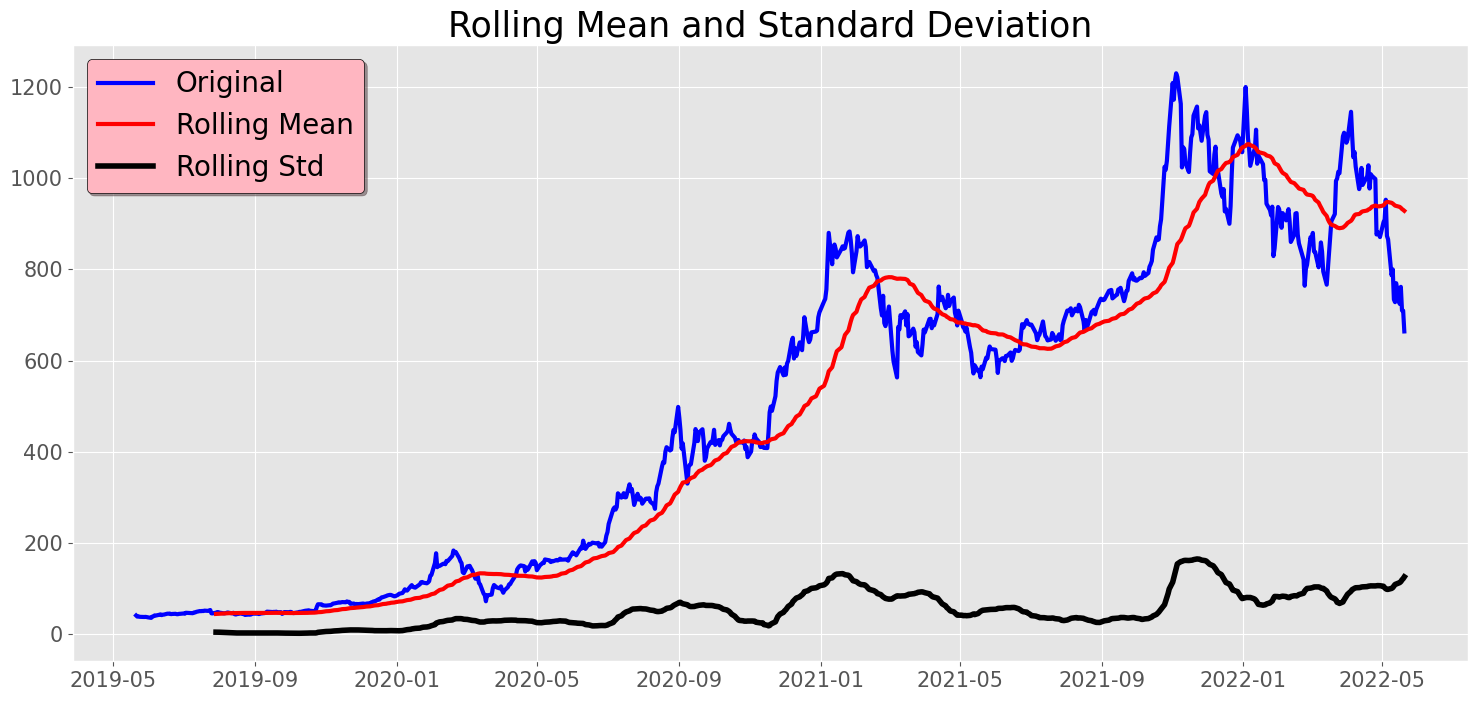

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64
Failed to reject null hypothesis,hence the data is non-stationary


In [87]:
test_stationarity(stock_data.Close)